<a href="https://colab.research.google.com/github/gustavohroos/treinamento-h2ia/blob/main/busca-tabu/tabu_search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Busca Tabu

## Problema da mochila
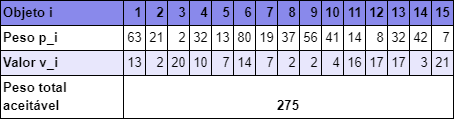

In [203]:
import numpy as np
import pandas as pd

In [204]:
MAX_WEIGHT = 275
weights = np.array([63, 21, 2, 32, 13, 80, 19, 37, 56, 41, 14, 8, 32, 42, 7])
values = np.array([13, 2, 20, 10, 7, 14, 7, 2, 2, 4, 16, 17, 17, 3, 21])
objects = pd.DataFrame({'weight': weights, 'value': values})
objects

,weight,value
0,63,13
1,21,2
2,2,20
3,32,10
4,13,7
5,80,14
6,19,7
7,37,2
8,56,2
9,41,4


In [205]:
from typing import List, Tuple, Set
from __future__ import annotations
from copy import deepcopy

class Knapsack:
    def __init__(self, 
                 array: np.ndarray = np.random.randint(2, size=15)) -> None:
        self.array = array
        self.state = pd.DataFrame(columns=['weight', 'value'])        
        self.weight = self.evaluate()[0]
        self.value = self.evaluate()[1]
        self.add(objects[pd.Series(data=(array == 1))])

    def add(self, objects) -> None:
        for index, obj in objects.iterrows():
            if self.weight + obj['weight'] <= MAX_WEIGHT:
                self.state = self.state.append(obj[['weight', 'value']])
                self.weight += obj['weight']
                self.value += obj['value']

    def remove(self, index: int) -> None:
        self.state.drop(labels=index, inplace=True)

    def indexes(self) -> np.ndarray:
        return self.state.index

    def evaluate(self) -> Tuple[int, int]:
        weight = self.state['weight'].sum()
        value = self.state['value'].sum()
        return weight, value

    def get_weight(self) -> int:
        return self.weight

    def get_value(self) -> int:
        return self.value

    def generate_neighbors(self, tabu_list: List[Knapsack]) -> List[Knapsack]:
        neighborhood = []
        for i in range(len(self.array)):
            neighbor = deepcopy(self.array)
            if neighbor.all() not in tabu_list:
                if neighbor[i] == 0:
                    neighbor[i] = 1
                else:
                    neighbor[i] = 0
                neighborhood.append(Knapsack(neighbor))
        return neighborhood

    def best_neighbor(self, tabu_list: List[Knapsack]) -> Knapsack:
        neighborhood = self.generate_neighbors(tabu_list)
        best = neighborhood[0]
        for neighbor in neighborhood:
            if neighbor.evaluate()[1] > best.evaluate()[1]:
                best = deepcopy(neighbor)
        return best

    def __gt__(self, other: Knapsack) -> bool:
        return self.value > other.value

    def __repr__(self) -> str:
        return f'Weight: {self.weight}, value: {self.value}\n{self.array}\n{"=-"*16}'

In [206]:
MAX_ITERATIONS = 50
TABU_LIST_SIZE = 10

def tabu_search(start_knap: Knapsack = Knapsack(), 
                tabu_list_size: int = TABU_LIST_SIZE, 
                max_iterations: int = MAX_ITERATIONS) -> Tuple[int, int]:
    tabu_list = []
    iterations = best_iteration = 0
    best_solution = current_solution = start_knap

    while iterations - best_iteration <= max_iterations:
        iterations += 1
        current_solution = current_solution.best_neighbor(tabu_list)
        tabu_list.append(current_solution)
        if not len(tabu_list) < tabu_list_size:
            tabu_list.pop(0)
        if current_solution > best_solution:
            del best_solution
            best_solution = current_solution
            best_iteration = iterations
    return best_solution

In [207]:
%%time
tabu_search()

CPU times: user 19.1 s, sys: 1.01 s, total: 20.1 s
Wall time: 18.3 s


Weight: 270, value: 142
[1 0 1 1 1 1 1 0 0 0 1 1 1 1 1]
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-

## Conclusão
O algoritmo se mostrou eficiente pois sempre retorna uma solução boa, porém demora cerca de 20~30 segundos para gerar um resultado e muitas vezes não chega na solução ótima (w = 270, v = 142).